# APIs

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Cross Validation

In [8]:
iris = load_iris()
logreg = LogisticRegression(max_iter=2000)

In [9]:
scores = cross_val_score(logreg, iris.data, iris.target)
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [10]:
print(f'Avg cross-validation score: {scores.mean():.2f}')

Avg cross-validation score: 0.97


## Stratified k-fold Cross Validation

In [11]:
kfold = KFold(n_splits=3)
print(f'Cross val scores w/o stratifying: {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross val scores w/o stratifying: [0. 0. 0.]


In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f'Cross val scores w/ shuffling: {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross val scores w/ shuffling: [0.98 0.96 0.96]


In [13]:
strat_kfold = StratifiedKFold(n_splits=3)
print(f'Cross val scores w/ shuffling: {cross_val_score(logreg, iris.data, iris.target, cv=strat_kfold)}')

Cross val scores w/ shuffling: [0.98 0.96 0.98]


## Leave-one-out cross-validation

In [14]:
l1out = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=l1out)
print(f'No of cv iterations: {len(scores)}')
print(f'Mean accuracy: {scores.mean():.3f}')

No of cv iterations: 150
Mean accuracy: 0.967


## Shuffle-split cross-validation

In [15]:
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f'Cross-val scores:\n{scores}')

Cross-val scores:
[0.96       0.96       0.94666667 0.94666667 0.98666667 1.
 0.94666667 0.94666667 0.98666667 1.        ]


# Grid Search

## With Cross-Validation

In [16]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [22]:
print(f'Test set score : {grid_search.score(X_test, y_test):.2f}')

Test set score : 0.97


In [24]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 10, 'gamma': 0.1}
Best score: 0.97


score method employs model trained on the whole training set.

The best_score_ attribute stores the mean CV accuracy, with CV performed on the training set

In [27]:
print(f'Best estimator: {grid_search.best_estimator_}')

Best estimator: SVC(C=10, gamma=0.1)


## Analyzing the result of CV

In [28]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000782,0.000213,0.000538,0.000096,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001131,0.000170,0.001021,0.000325,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001055,0.000345,0.000622,0.000184,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000631,0.000013,0.000457,0.000010,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001134,0.000390,0.000703,0.000137,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [29]:
results.shape

(36, 15)

In [40]:
scores = np.array(results.mean_test_score).reshape(6, 6)

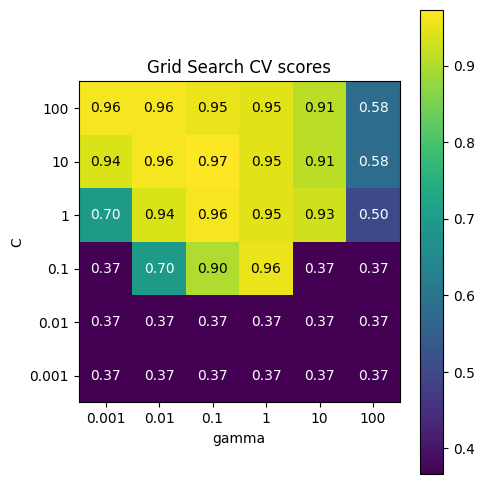

In [45]:
plt.figure(figsize=(5,5))
plt.imshow(scores, cmap='viridis', origin='lower')
plt.xlabel('gamma')
plt.xticks(range(len(param_grid['gamma'])), param_grid['gamma'])
plt.ylabel('C')
plt.yticks(range(len(param_grid['C'])), param_grid['C'])
plt.colorbar()
plt.title('Grid Search CV scores')
plt.tight_layout()

for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        plt.text(j, i, f'{scores[i, j]:.2f}', ha='center', va='center', color='w' if scores[i, j] < 0.7 else 'k')

## param_grid

In [46]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
               {'kernel': ['linear'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(f'List of grids:\n{param_grid}')

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [48]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV score: {grid_search.best_score_:.2f}')

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV score: 0.97


In [49]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00124,0.000922,0.000776,0.000629,0.000642,0.000678,0.00086,0.000688,0.000667,0.000698,...,0.000477,0.000553,0.000783,0.000885,0.000612,0.000589,0.000503,0.000533,0.000495,0.000496
std_fit_time,0.000661,0.000145,0.000148,0.000031,0.00002,0.000013,0.000158,0.000061,0.000011,0.000077,...,0.000015,0.000014,0.000045,0.000064,0.00001,0.00002,0.000009,0.000049,0.000014,0.000024
mean_score_time,0.000803,0.000576,0.000546,0.000441,0.000456,0.000474,0.000668,0.000492,0.000477,0.000502,...,0.000383,0.000395,0.000461,0.000567,0.000417,0.000422,0.00038,0.000477,0.000379,0.000373
std_score_time,0.000125,0.000097,0.000094,0.000016,0.000024,0.000014,0.000148,0.000039,0.000009,0.000048,...,0.000029,0.00001,0.000005,0.000107,0.000011,0.000014,0.00001,0.000181,0.000003,0.000012
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


## Nested CV

In [50]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print(f'CV scores: {scores}')
print(f'Mean CV score: {scores.mean():.2f}')

CV scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean CV score: 0.97
